In [1]:
#import all the packages and libraries needed for our project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

In [2]:
#Calling a magic function from matplotlib
%matplotlib inline

In [3]:
#define our data frame using the pandas read csv function to import our dataset
df = pd.read_csv("C:\datasets\listings.csv")

In [4]:
#Take a quick look at what our data set looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4213 non-null   int64  
 1   name                            4213 non-null   object 
 2   host_id                         4213 non-null   int64  
 3   host_name                       4021 non-null   object 
 4   neighbourhood_group             4213 non-null   object 
 5   neighbourhood                   4213 non-null   object 
 6   latitude                        4213 non-null   float64
 7   longitude                       4213 non-null   float64
 8   room_type                       4213 non-null   object 
 9   price                           4213 non-null   int64  
 10  minimum_nights                  4213 non-null   int64  
 11  number_of_reviews               4213 non-null   int64  
 12  last_review                     34

In [5]:
#Rows and columns in the df
df.shape

(4213, 16)

In [6]:
#number of values in the df
df.size

67408

In [7]:
#summary statistics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.213000e+03,4.213000e+03,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,3490.000000,4213.000000,4213.000000
mean,2.775722e+07,8.248671e+07,47.625014,-122.334119,134.268217,15.863755,62.299786,1.898146,16.420366,169.132685
std,1.524790e+07,1.002833e+08,0.046989,0.033067,119.997415,19.342000,92.163157,1.759701,33.418334,127.371810
min,2.318000e+03,2.536000e+03,47.496210,-122.418760,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.511665e+07,8.534462e+06,47.604470,-122.355710,78.000000,2.000000,2.000000,0.520000,1.000000,54.000000
50%,2.822244e+07,3.939669e+07,47.621200,-122.333860,107.000000,4.000000,23.000000,1.380000,2.000000,152.000000
75%,4.264860e+07,1.157539e+08,47.660610,-122.310660,154.000000,30.000000,85.000000,2.787500,7.000000,292.000000
max,4.872752e+07,3.913442e+08,47.733990,-122.241980,3858.000000,365.000000,978.000000,12.160000,140.000000,365.000000


In [8]:
#correlation matrix
#We can see a negative correlation between our main 
#explanatory varaible reviews_per_month and 
#the outcome variable price
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.452458,-0.111295,0.015984,-0.019800,0.016576,-0.558131,-0.053653,0.358158,-0.033465
host_id,0.452458,1.000000,-0.053764,-0.002813,0.029564,0.059231,-0.241378,-0.003195,0.079549,0.073660
latitude,-0.111295,-0.053764,1.000000,-0.134697,0.021892,0.050049,0.035875,-0.037429,-0.045775,0.005415
longitude,0.015984,-0.002813,-0.134697,1.000000,-0.081257,0.016866,-0.043966,-0.050525,0.036903,0.012367
price,-0.019800,0.029564,0.021892,-0.081257,1.000000,0.007645,-0.108919,-0.155569,0.019099,0.066522
minimum_nights,0.016576,0.059231,0.050049,0.016866,0.007645,1.000000,-0.221402,-0.341496,0.271925,0.145852
number_of_reviews,-0.558131,-0.241378,0.035875,-0.043966,-0.108919,-0.221402,1.000000,0.751584,-0.269440,-0.050220
reviews_per_month,-0.053653,-0.003195,-0.037429,-0.050525,-0.155569,-0.341496,0.751584,1.000000,-0.247023,-0.084510
calculated_host_listings_count,0.358158,0.079549,-0.045775,0.036903,0.019099,0.271925,-0.269440,-0.247023,1.000000,0.172565
availability_365,-0.033465,0.073660,0.005415,0.012367,0.066522,0.145852,-0.050220,-0.084510,0.172565,1.000000


In [9]:
#We want to look at price as our outcome variable; reviews per month as our main explanatory variable; 
#minimum nights, availability, latitude, longitude, calculated_host_listings_count as our controls;

In [10]:
#Start some data cleaning:

In [11]:
#Count the number of missing values in our main explanitory variable column.  We also know this from our describe method
df['reviews_per_month'].isna().sum()

723

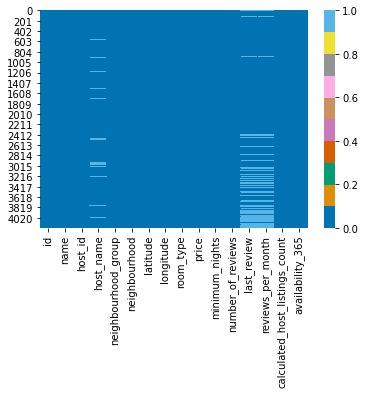

In [12]:
#heat map for missing values
cols=df.columns
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(palette='colorblind')) 
plt.show()


In [13]:
#In this case we will use mean value imputation to fill the missing  values
#Assign the imputed data set to new frame df1 so that the original data frame df is preserved
df1 = df.fillna(df.mean())
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4213 non-null   int64  
 1   name                            4213 non-null   object 
 2   host_id                         4213 non-null   int64  
 3   host_name                       4021 non-null   object 
 4   neighbourhood_group             4213 non-null   object 
 5   neighbourhood                   4213 non-null   object 
 6   latitude                        4213 non-null   float64
 7   longitude                       4213 non-null   float64
 8   room_type                       4213 non-null   object 
 9   price                           4213 non-null   int64  
 10  minimum_nights                  4213 non-null   int64  
 11  number_of_reviews               4213 non-null   int64  
 12  last_review                     34

In [14]:
#Show the summary statistics for our outcome variable price
df1.price.describe()

count    4213.000000
mean      134.268217
std       119.997415
min         0.000000
25%        78.000000
50%       107.000000
75%       154.000000
max      3858.000000
Name: price, dtype: float64

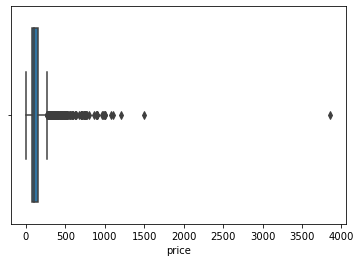

In [15]:
#Create a box plot of out outcome variable price.  We see that there are a lot of outliers.  All outliers are on the more expensive side
sns.boxplot(data=df1,x='price')
plt.show()


In [16]:
#Show the summary statistics for our main explanatory variable price
df1.reviews_per_month.describe()

count    4213.000000
mean        1.898146
std         1.601567
min         0.010000
25%         0.660000
50%         1.870000
75%         2.430000
max        12.160000
Name: reviews_per_month, dtype: float64

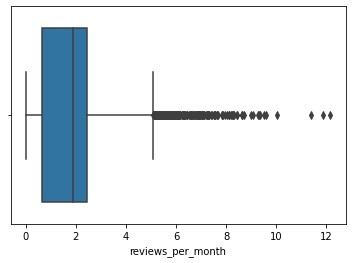

In [17]:
#Create a box plot of our main explanatory variable price.  We see that there are a lot of outliers.  All outliers are on the max side
#This shows that the variable is skewed right
sns.boxplot(data=df1,x='reviews_per_month')
plt.show()

In [18]:
#Create a further refined data frame with all duplicate values dropped
df2 = df1.drop('id', axis=1).drop_duplicates()

In [19]:
#compare the shape of df1 and df2 to see how many duplicate records were dropped
df1.shape

(4213, 16)

In [20]:
#We see there were 6 duplicate rows even though id is supposed to be unique
df2.shape

(4207, 15)

In [21]:
#Correlation matrix again, but now with our clean data
#Negative correlation between our outcome and explanatory variable still exists
df2.corr()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,-0.053433,-0.001877,0.029237,0.048831,-0.240102,-0.002534,0.070851,0.068239
latitude,-0.053433,1.000000,-0.134759,0.021899,0.051189,0.035734,-0.035200,-0.045422,0.005763
longitude,-0.001877,-0.134759,1.000000,-0.081273,0.017770,-0.044216,-0.047544,0.037877,0.012903
price,0.029237,0.021899,-0.081273,1.000000,0.007626,-0.108844,-0.123658,0.018755,0.066368
minimum_nights,0.048831,0.051189,0.017770,0.007626,1.000000,-0.220347,-0.260134,0.265379,0.141099
number_of_reviews,-0.240102,0.035734,-0.044216,-0.108844,-0.220347,1.000000,0.715351,-0.268318,-0.048868
reviews_per_month,-0.002534,-0.035200,-0.047544,-0.123658,-0.260134,0.715351,1.000000,-0.135345,-0.074829
calculated_host_listings_count,0.070851,-0.045422,0.037877,0.018755,0.265379,-0.268318,-0.135345,1.000000,0.168422
availability_365,0.068239,0.005763,0.012903,0.066368,0.141099,-0.048868,-0.074829,0.168422,1.000000


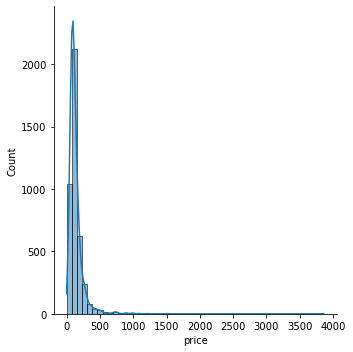

In [22]:
#Visualize the distribution of our outcome variable price
sns.displot(data=df2, x="price",bins=50,kde=True)

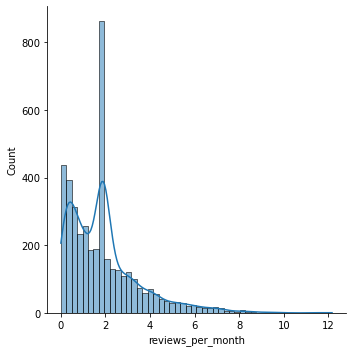

In [23]:
#Visualize the distribution of main explanatory variable reviews per month
sns.displot(data=df2, x="reviews_per_month",bins=50,kde=True)

In [24]:
#creating the OLS models with our variables of interest using df2 as our most refined df
model1 = smf.ols('price ~ reviews_per_month', data = df2)
model2 = smf.ols('price ~ reviews_per_month + minimum_nights', data = df2)
model3 = smf.ols('price ~ reviews_per_month + minimum_nights + latitude', data = df2)
model4 = smf.ols('price ~ reviews_per_month + minimum_nights + latitude + longitude', data = df2)
model5 = smf.ols('price ~ reviews_per_month + minimum_nights + latitude + longitude + availability_365', data = df2)
model6 = smf.ols('price ~ reviews_per_month + minimum_nights + latitude + longitude + availability_365 + calculated_host_listings_count', data = df2)


In [25]:
#estimate the model
results1 =model1.fit()
results2 =model2.fit()
results3 =model3.fit()
results4 =model4.fit()
results5 =model5.fit()
results6 =model6.fit()

In [26]:
#print the results
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     65.30
Date:                Mon, 24 May 2021   Prob (F-statistic):           8.34e-16
Time:                        14:57:07   Log-Likelihood:                -26080.
No. Observations:                4207   AIC:                         5.216e+04
Df Residuals:                    4205   BIC:                         5.218e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.8319      2.848     53.312      0.000     146.248     157.415
reviews_per_month    -9.2642      1.146     -8.081      0.000     -11.512      -7.017
==============================================================================
Omnibus:                     6728.400   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10251183.235
Skew:                           9.899   Prob(JB):                         0.00
Kurtosis:                     244.016   Cond. No.                         4.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     34.04
Date:                Mon, 24 May 2021   Prob (F-statistic):           2.16e-15
Time:                        14:57:07   Log-Likelihood:                -26079.
No. Observations:                4207   AIC:                         5.216e+04
Df Residuals:                    4204   BIC:                         5.218e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           155.4020      3.567     43.562      0.000     148.408     162.396
reviews_per_month    -9.7773      1.187     -8.236      0.000     -12.105      -7.450
minimum_nights       -0.1645      0.099     -1.661      0.097      -0.359       0.030
==============================================================================
Omnibus:                     6735.718   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10327067.898
Skew:                           9.919   Prob(JB):                         0.00
Kurtosis:                     244.909   Cond. No.                         49.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     23.19
Date:                Mon, 24 May 2021   Prob (F-statistic):           6.91e-15
Time:                        14:57:07   Log-Likelihood:                -26078.
No. Observations:                4207   AIC:                         5.216e+04
Df Residuals:                    4203   BIC:                         5.219e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2120.0940   1863.457     -1.138      0.255   -5773.455    1533.267
reviews_per_month    -9.7444      1.187     -8.207      0.000     -12.072      -7.417
minimum_nights       -0.1697      0.099     -1.713      0.087      -0.364       0.025
latitude             47.7799     39.128      1.221      0.222     -28.932     124.491
==============================================================================
Omnibus:                     6731.228   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10295384.148
Skew:                           9.906   Prob(JB):                         0.00
Kurtosis:                     244.537   Cond. No.                     5.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     25.36
Date:                Mon, 24 May 2021   Prob (F-statistic):           8.67e-21
Time:                        14:57:07   Log-Likelihood:                -26062.
No. Observations:                4207   AIC:                         5.213e+04
Df Residuals:                    4202   BIC:                         5.217e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.898e+04   6839.329     -5.699      0.000   -5.24e+04   -2.56e+04
reviews_per_month   -10.0627      1.184     -8.496      0.000     -12.385      -7.741
minimum_nights       -0.1633      0.099     -1.654      0.098      -0.357       0.030
latitude             17.5769     39.359      0.447      0.655     -59.587      94.741
longitude          -313.0463     55.908     -5.599      0.000    -422.655    -203.437
==============================================================================
Omnibus:                     6736.610   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10392559.343
Skew:                           9.920   Prob(JB):                         0.00
Kurtosis:                     245.680   Cond. No.                     4.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     23.66
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.58e-23
Time:                        14:57:07   Log-Likelihood:                -26054.
No. Observations:                4207   AIC:                         5.212e+04
Df Residuals:                    4201   BIC:                         5.216e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.923e+04   6827.062     -5.746      0.000   -5.26e+04   -2.58e+04
reviews_per_month    -9.8732      1.183     -8.345      0.000     -12.193      -7.554
minimum_nights       -0.2142      0.099     -2.156      0.031      -0.409      -0.019
latitude             17.7677     39.287      0.452      0.651     -59.255      94.790
longitude          -314.9709     55.807     -5.644      0.000    -424.383    -205.559
availability_365      0.0589      0.015      4.058      0.000       0.030       0.087
==============================================================================
Omnibus:                     6752.280   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10552600.262
Skew:                           9.964   Prob(JB):                         0.00
Kurtosis:                     247.547   Cond. No.                     8.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     19.72
Date:                Mon, 24 May 2021   Prob (F-statistic):           7.96e-23
Time:                        14:57:07   Log-Likelihood:                -26054.
No. Observations:                4207   AIC:                         5.212e+04
Df Residuals:                    4200   BIC:                         5.217e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -3.929e+04   6832.892     -5.750      0.000   -5.27e+04   -2.59e+04
reviews_per_month                 -9.8561      1.186     -8.311      0.000     -12.181      -7.531
minimum_nights                    -0.2192      0.102     -2.148      0.032      -0.419      -0.019
latitude                          18.2725     39.361      0.464      0.643     -58.897      95.442
longitude                       -315.2347     55.827     -5.647      0.000    -424.686    -205.784
availability_365                   0.0585      0.015      3.992      0.000       0.030       0.087
calculated_host_listings_count     0.0124      0.058      0.215      0.830      -0.101       0.126
==============================================================================
Omnibus:                     6753.548   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10559405.651
Skew:                           9.968   Prob(JB):                         0.00
Kurtosis:                     247.625   Cond. No.                     8.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#Create a nice table to view the results of our model
results_table = summary_col(results=[results1,results2,results3,results4,results5,results6],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1','Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'],
                            )

results_table.add_title('Table 1 - OLS Regressions')

print(results_table)

                                     Table 1 - OLS Regressions
                                Model 1   Model 2   Model 3    Model 4      Model 5      Model 6   
---------------------------------------------------------------------------------------------------
Intercept                      151.83*** 155.40*** -2120.09  -38977.41*** -39231.45*** -39287.85***
                               (2.85)    (3.57)    (1863.46) (6839.33)    (6827.06)    (6832.89)   
R-squared                      0.02      0.02      0.02      0.02         0.03         0.03        
R-squared Adj.                 0.02      0.02      0.02      0.02         0.03         0.03        
availability_365                                                          0.06***      0.06***     
                                                                          (0.01)       (0.01)      
calculated_host_listings_count                                                         0.01        
                                     

<AxesSubplot:>

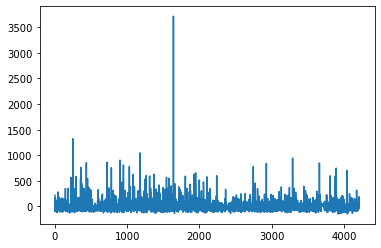

In [33]:
#The residual plot shows that our endogeniety and homogeneity assumptions are violated.
#Ideally the residual plot would be very random in nature and would have any patterns. Instead, it almost looks bimodal with one large spike. amd most of the
#residuals seem to reside in a fairly tight band near the axis
results6.resid.plot()


In [34]:
#We are using model 6 for our analysis because it has the highest R-squared value
#and the most statistically significant explanatory variable

<AxesSubplot:xlabel='price', ylabel='reviews_per_month'>

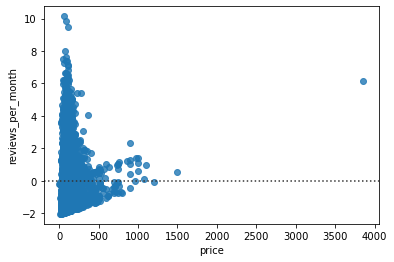

In [35]:
sns.residplot(x='price',y='reviews_per_month',data = df2)

<AxesSubplot:>

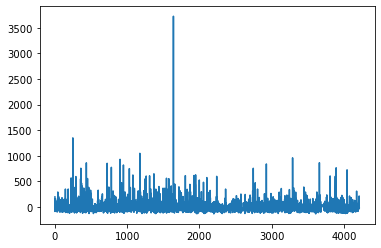

In [38]:
#The following residual plots are given for the project rubric and completeness
results1.resid.plot()

<AxesSubplot:>

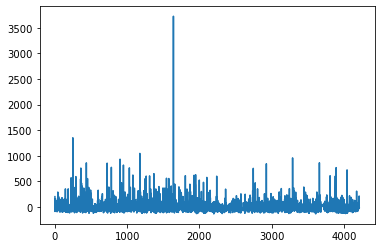

In [39]:
results2.resid.plot()

<AxesSubplot:>

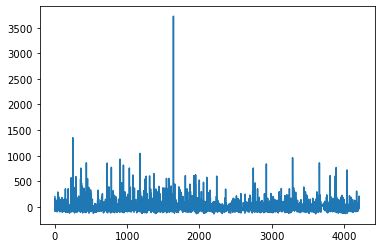

In [40]:
results3.resid.plot()

<AxesSubplot:>

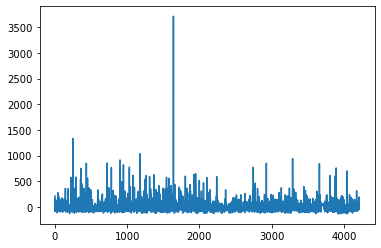

In [41]:
results4.resid.plot()

<AxesSubplot:>

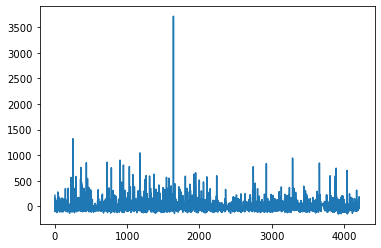

In [42]:
results5.resid.plot()

In [36]:
#Interpreting results:
#For every additional monthly review the price of a unit decreases by 9 dollars and
#87 cents (99% confident)
#For each additional number of minimum nights the price decreases by 21 cents (95% confident)
# For each additional degree of longitude west traveled in Seattle the price decreases 315 dollars and 23 cents (99% confident)
#For each additional day in a year the AirBnb is available the price increases 6 cents (99% confident)
#There is no reason to interpret our other coeffecients because they are not statistically significant

In [37]:
#Limitations: The biggest limit is that our model has a really low
#R-squared value which means the variation in our explanatory variables
#does not actually explain the variation in the outcome variable.
#In fact, our model only explains 3% of the varaition in price.  This means
#there are many other outside factors that influence the price of an 
# AirBnb unit.

#additionally our variables are not transformed.  Some of the distributions we
#examined in data exploration were heavily skewed and had many outliers.
#Another limitation is the contextualization of the research question.
#Our main outcome variable is the price which is set by the owner who
#in reality probably does not have a flawless system for setting their price that
#maximizes possible revenue. In other words price does not perfectly reflect value